In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv("Training Data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data['Dependents'] = data['Dependents'].replace('3+', 3)
data['Dependents'] = data['Dependents'].fillna(0).astype(int)

In [7]:
# 1: Ratio of Male to Female
gender_ratio = data['Gender'].value_counts(normalize=True)
print(gender_ratio)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


In [8]:
# 2: Number of Males Married and Non-Married
males_marital_status = data[data['Gender'] == 'Male']['Married'].value_counts()
print(males_marital_status)

Yes    357
No     130
Name: Married, dtype: int64


In [9]:
# 3: Number of Females Married and Non-Married
females_marital_status = data[data['Gender'] == 'Female']['Married'].value_counts()
print(females_marital_status)

No     80
Yes    31
Name: Married, dtype: int64


In [10]:
# 4: Number of Graduated and Non-Graduated Males and Females with Marital Status
graduate_marital_status = data.groupby(['Gender', 'Education', 'Married'])['Loan_ID'].count()
print(graduate_marital_status)

Gender  Education     Married
Female  Graduate      No          66
                      Yes         25
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No          99
                      Yes        275
        Not Graduate  No          31
                      Yes         82
Name: Loan_ID, dtype: int64


In [11]:
# 5: Encoding for the "Education" Column (One-Hot Encoding)
edu_encoded = pd.get_dummies(data['Education'], prefix='Education')
print(edu_encoded)

     Education_Graduate  Education_Not Graduate
0                     1                       0
1                     1                       0
2                     1                       0
3                     0                       1
4                     1                       0
..                  ...                     ...
609                   1                       0
610                   1                       0
611                   1                       0
612                   1                       0
613                   1                       0

[614 rows x 2 columns]


In [12]:
# 6: Gender with Highest Loan Amount
highest_loan_gender = data.loc[data['LoanAmount'].idxmax()]['Gender']
print(highest_loan_gender)

nan


In [13]:
# 7: Applicant with Highest Income
highest_income_applicant = data.loc[data['ApplicantIncome'].idxmax()]
print(highest_income_applicant)

Loan_ID              LP002317
Gender                   Male
Married                   Yes
Dependents                  3
Education            Graduate
Self_Employed              No
ApplicantIncome         81000
CoapplicantIncome         0.0
LoanAmount              360.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
Name: 409, dtype: object


In [14]:
# 8: Features for Model Training
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
            'Credit_History', 'Property_Area']

Choosing a specific machine learning model is an important step that needs careful consideration. The features you choose directly affect your model's performance and ability to predict accurately. The following are reasons for choosing certain features for the model:

Gender: Gender will influence the decision to borrow, especially if there are specific or gender-related norms.

Married: Married can be a factor in loan approval. Married people can be considered financially stable.

Dependents: The number of dependents per applicant can affect their financial security and ability to repay the loan.

Education: Education level will be related to income and financial responsibility affecting loan approval.

Self_Employed: Being self-employed can affect an applicant's security and ability to repay the loan.

ApplicantIncome: A higher income may indicate a better ability to repay the loan.

CoapplicantIncome:  The applicant's income, if any, contributes to the total fund.

LoanAmount:  The loan application is an important factor in the loan decision.

Loan_Amount_Term: The maturity of the loan will affect the applicant's ability to repay.

Credit_History: A good credit history generally increases the chances of getting approved for a loan.

Property_Area: The region where the property is located will affect the credit decision due to different markets in different regions.

These features are selected based on their relevance to credit decisions and their predictive power.
However, feature selection is often an iterative process that requires extensive registration, testing, and validation to identify the most important features for a given set of issues at hand. You may also consider exploring additional features, optimizing workflows, or using techniques such as factor analysis to further improve the process.

In [15]:
# 9: Choice of Model (Logistic Regression example)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
X = data[features]
y = data['Loan_Status']

In [21]:
X_encoded = pd.get_dummies(X, columns=['Gender', 'Married', 'Education', 'Self_Employed',
                                       'Credit_History', 'Property_Area'], drop_first=True)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
prediction = model.predict(X_test)

In [27]:
print("Accuracy Score",accuracy_score(y_test,prediction))

Accuracy Score 0.7479674796747967


I'm using a simple logistic regression example to illustrate. However, depending on the nature of the problem and the characteristics of the data, the logistic regression model may not be the most appropriate choice. Let me explain the reason for choosing logistic regression in this example:

Why choose logistic regression:

Binary classification problems: Logistic regression is often used in binary classification problems where the mode different target has two classes, this is where "Loan_Status" is "Y" (credit approved) or " N" (credit disapproved). which factors contribute to the credit decision.
Efficiency and simplicity: Logistic regression is computationally efficient and relatively simple compared to more complex algorithms. It can be a good starting point for modelling.

Linear Assumption: Logistic regression assumes a linear relationship between the goal and the log-probabilities of the features. Although this is simple, considerations are required for this question.

However, it is important to remember that the choice of machine learning algorithm depends on many factors, including the complexity of the problem, the size of the data, the distribution of features, and the tradeoffs between interpretive and predictive models.
For more complex analysis, you might consider trying other algorithms such as decision trees, random forests, gradient boosting or even deep learning depending on the context.

Finally, model selection should be guided by extensive testing, cross-validation, and problem-specific considerations.

In [28]:
# 10: Hyperparameter Tuning (Grid Search example)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
# 11: Compare Actual and Predicted Results
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
print(comparison)

    Actual Predicted
350      Y         Y
377      Y         Y
163      Y         Y
609      Y         Y
132      Y         Y
..     ...       ...
231      Y         Y
312      Y         Y
248      Y         Y
11       Y         Y
333      Y         Y

[123 rows x 2 columns]


In [31]:
# Task 12: Model Accuracy
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.7479674796747967


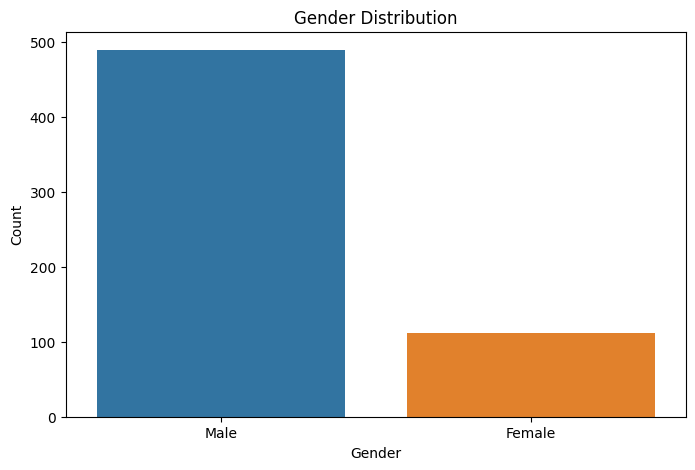

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [33]:
import pickle

In [34]:
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [35]:
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [36]:
load_prediction = loaded_model.predict(X_test)

In [37]:
print(load_prediction)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
